In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [55]:
data = pd.read_csv('states_all.csv', sep=",")

In [56]:
data.shape

(1715, 25)

In [57]:
data.isnull().sum()

In [58]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [59]:
data.dtypes

In [60]:
#данный признак является единственным категориальным в данном датасете, 
#поэтому кодирование будет проводиться относительно данного признака
state_df = pd.DataFrame(data, columns=['STATE'])

In [61]:
#Выполним преобразование категориальных признаков в количественные
le = LabelEncoder()
cat_enc_le = le.fit_transform(state_df['STATE'])

In [62]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

In [63]:
cat_enc_le

In [64]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(state_df[['STATE']])

In [65]:
cat_enc_ohe

<1715x53 sparse matrix of type '<class 'numpy.float64'>'
	with 1715 stored elements in Compressed Sparse Row format>

In [66]:
cat_enc_ohe.todense()[0:50]

In [67]:
state_df.head(50)

,STATE
0,ALABAMA
1,ALASKA
2,ARIZONA
3,ARKANSAS
4,CALIFORNIA
5,COLORADO
6,CONNECTICUT
7,DELAWARE
8,DISTRICT_OF_COLUMBIA
9,FLORIDA


In [68]:
#выполним MinMax масштабирование
sc1 = MinMaxScaler() 
sc1_data = sc1.fit_transform(data[['GRADES_ALL_G']])

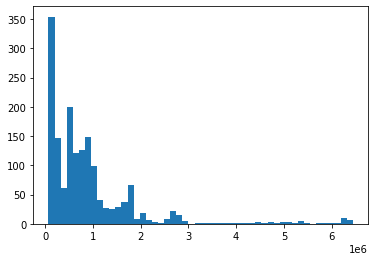

In [69]:
plt.hist(data['GRADES_ALL_G'], 50)
plt.show()

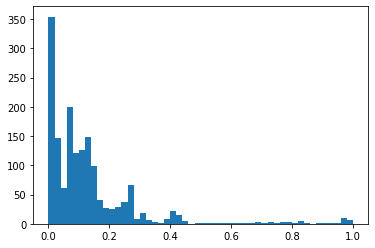

In [70]:
plt.hist(sc1_data, 50)
plt.show()

In [71]:
#выполним масштабирование на основе Z-оценки
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['GRADES_ALL_G']])

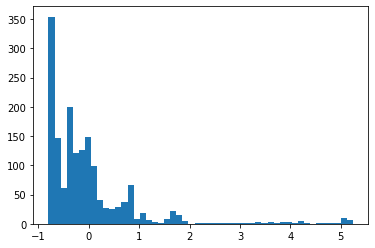

In [72]:
plt.hist(sc2_data, 50)
plt.show()

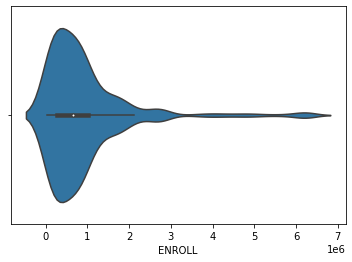

In [73]:
#Построение cкрипичной диаграммы (violin plot)
sns.violinplot(x=data['ENROLL']) #диаграмма о количестве учащихся 